In [1]:
!pip install scikit-fuzzy   # thư viện fuzzy logic  ( logic mờ )

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=5db0e03877553597bb76a889f12c9f6d36babcac73160f2e09b21f28fc159f10
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


25.0


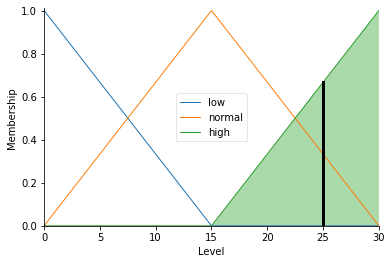

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

valve = ctrl.Antecedent(np.arange(0,101,1),'Valve') #đầu vào
level = ctrl.Consequent(np.arange(0,31,1),'Level')  #đầu ra 

# Type
valve['close'] = fuzz.trimf(valve.universe,[0,0,50])     #0 - 100%
valve['average'] = fuzz.trimf(valve.universe,[0,50,100]) 
valve['open'] = fuzz.trimf(valve.universe,[50,100,100]) 

level['low'] = fuzz.trimf(level.universe,[0,0,15])    #0 - 30 cm
level['normal'] = fuzz.trimf(level.universe,[0,15,30]) 
level['high'] = fuzz.trimf(level.universe,[15,30,30]) 

#valve.view()

rule1=ctrl.Rule(valve['close'] , level['low'])
rule2=ctrl.Rule(valve['average'] , level['normal'])
rule3=ctrl.Rule(valve['open'] , level['high'])

#rule1.view()

level_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
leveling = ctrl.ControlSystemSimulation(level_ctrl)
leveling.input['Valve'] = 100     # 0 - 100%
leveling.compute()
print(leveling.output['Level'])
level.view(sim = leveling)